In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import multivariate_normal
from matplotlib import pyplot as plt
import os.path

In [5]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

# Generación de datos

In [3]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X = multivariate_normal([0.5, 0.5], 100)
    return X

In [4]:
X, y = generate_elipse_data()

In [5]:
#X, y = generate_gaussians_distributions()

# Graficamos

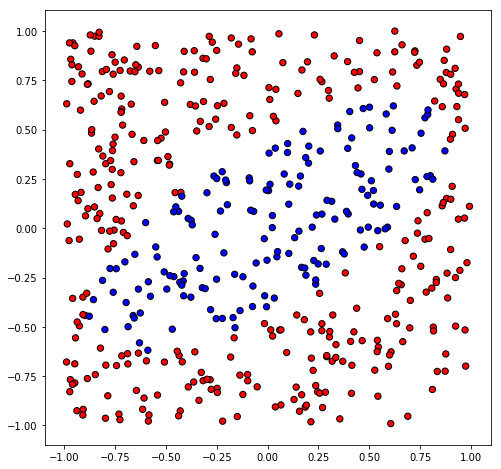

In [6]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

# Inicialización del modelo

Para Naive Bayes probar con: 
- priors=None, var_smoothing 1e-09
- priors=None, var_smoothing 0.2
- priors=[0.5, 0.5], var_smoothing 1e-09

Para QDA:
- priors=None, reg_param=0.0, store_covariance=True

In [7]:
model = GaussianNB(priors=None, var_smoothing=1e-09)
# model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True)

In [8]:
# Entrenamiento del modelo
model.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
if type(model)==GaussianNB:
    print(model.classes_) 
    prior1, prior2 = model.class_prior_
    sigma1, sigma2 = model.sigma_
    mu1, mu2 = model.theta_

[0 1]


In [10]:
if type(model)==QuadraticDiscriminantAnalysis:
    print(model.classes_) 
    prior1, prior2 =  model.priors_
    mu1, mu2 = model.means_
    sigma1, sigma2 = model.covariance_

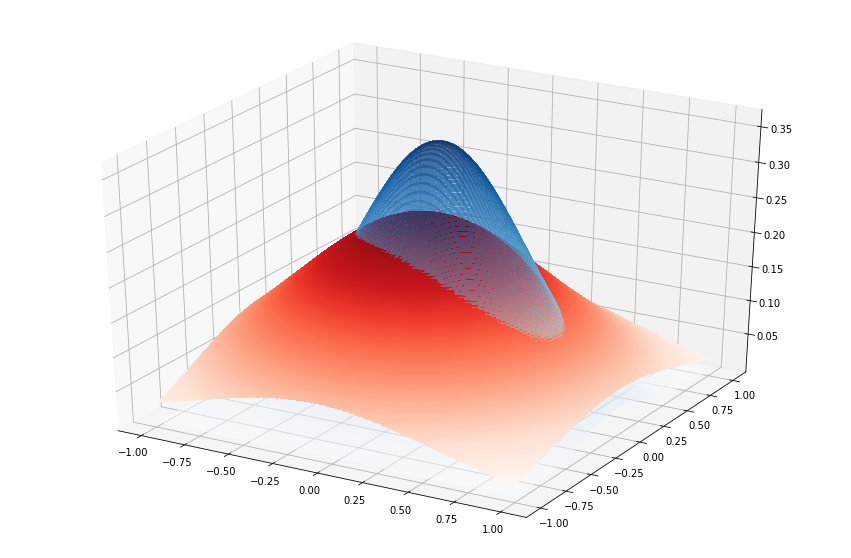

In [11]:
plot_gaussians(X, mu1, sigma1, mu2, sigma2, prior1, prior2)

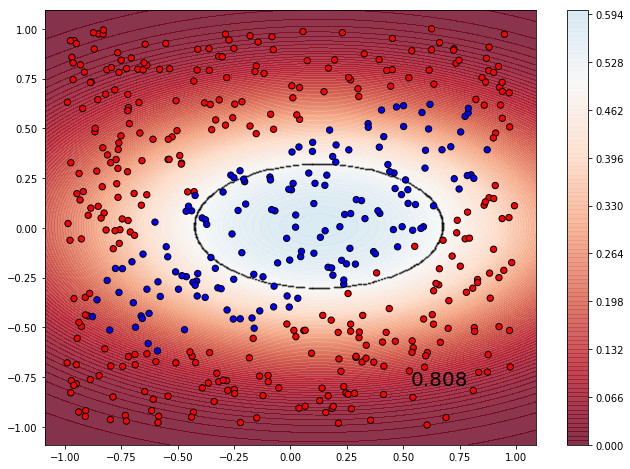

In [12]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)